# **Comparison of Covid19 trend in Italy and Sweden**

We first examine the 138-day trend of active cases in Italy [1] and Sweden [2] since the day they reached 1000 (February 29 for Italy, March 15 for Sweden). 

Italy was in lockdown since March 9 and has lifted the majority of the lockdown measures on May 18. Sweden has not enforced a lockdown as of July 31.

The active cases are calculated as: total cases - deaths - recoveries.

The graphs also show hospitalized cases, intensive care unit cases and deaths for the same time period (February 29 - July 15 for Italy, March 15 - July 30 for Sweden).

Below is an outline of the countries' population figures (last updated July 18):

Country | Population | Density | Urban population | Median age | Pop. over 65 y.o.
:---: | :---: | :---: | :---: | :---: | :---:
Italy | 60,461,826 | 206/km^2 | 69% | 47 | 23%
Sweden | 10,099,265 | 25/km^2 | 88% | 41 | 19.9%

**Sweden has not reported its recoveries since May 4, making the number of active cases unreliable and likely greatly overestimated.**

[1] [pcm-dpc/COVID-19: Dati COVID-19 Italia](https://github.com/pcm-dpc/COVID-19/tree/master/dati-json)

[2] [C19.SE - Coronavirus i Sverige](https://c19.se/)




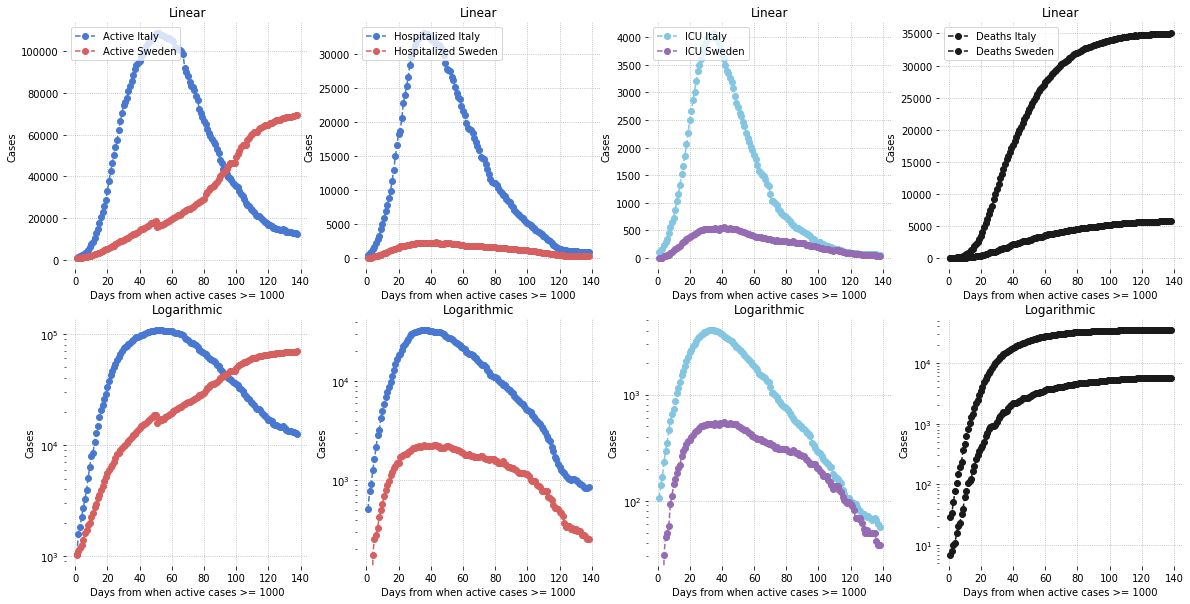

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils

italy_active = utils.load_italy_active(5)[:-15]


sweden_active = np.array([1036, 1113, 1187, 1276, 1412, 1607, 1734, 1897, 2003, 2243, 2448, 2747, 2948, 3326, 3574, 3928, 4291, 4735, 
                          5157, 5566, 5961, 6350, 6634, 7026, 7653, 8233, 8498, 9016, 9352, 9717, 10087, 10427, 10794, 11337, 11871, 
                          12382, 12691, 13039, 13603, 14247, 14969, 15027, 15548, 15740, 16349, 16904, 17591, 17963, 18483, 18713, 
                          15918, 16383, 16985, 16686, 17234, 17819, 18175, 18544, 19054, 19561, 20172, 20712, 21095, 21533, 21784, 
                          22171, 22853, 23390, 24026, 24296, 24534, 24988, 25487, 26081, 26644, 27260, 27915, 28350, 28668, 29302, 
                          31396, 32495, 33499, 34297, 35185, 35608, 36396, 37105, 38668, 40042, 41158, 41804, 42503, 43400, 44753, 
                          46311, 46311, 46611, 46611, 49196, 50854, 52204, 53892, 54961, 55209, 55209, 57439, 58229, 59551, 60331, 
                          61174, 61174, 61307, 62820, 63052, 63586, 63964, 64484, 64484, 64484, 65376, 65672, 66100, 66475, 66829, 
                          66907, 66907, 67641, 67770, 68059, 68296, 68537, 68537, 68537, 68879, 69012, 69253, 69560])

italy_hospitalized = utils.load_italy_hosp(5)[:-15]                     

sweden_hospitalized = np.concatenate((np.array([0, 0, 0]), utils.load_sweden_hosp(0)[1:]))

italy_icu = utils.load_italy_icu(5)[:-15] 

sweden_icu = np.concatenate((np.array([0, 0, 0]), utils.load_sweden_icu(0)[1:]))

italy_d =  utils.load_italy_deaths(5)[:-15] 

sweden_d = utils.load_sweden_deaths(4)[1:]

x = np.arange(1, len(italy_active) + 1)

fig = plt.figure()
ax1 = fig.add_subplot(241)
ax1.plot(x, italy_active, '--bo', label='Active Italy')
ax1.plot(x, sweden_active, '--ro', label='Active Sweden')
ax1.legend(loc="upper left")
ax1.set_title('Linear')
ax1.set_xlabel('Days from when active cases >= 1000')
ax1.set_ylabel('Cases')
ax1.axes.grid(linestyle='dotted')

ax2 = fig.add_subplot(245)
ax2.plot(x, italy_active, '--bo')
ax2.plot(x, sweden_active, '--ro')
ax2.set_title('Logarithmic')
ax2.set_xlabel('Days from when active cases >= 1000')
ax2.set_ylabel('Cases')
ax2.set_yscale('log')
ax2.axes.grid(linestyle='dotted')

ax3 = fig.add_subplot(242)
ax3.plot(x, italy_hospitalized, '--bo', label='Hospitalized Italy')
ax3.plot(x, sweden_hospitalized, '--ro', label='Hospitalized Sweden')
ax3.legend(loc="upper left")
ax3.set_title('Linear')
ax3.set_xlabel('Days from when active cases >= 1000')
ax3.set_ylabel('Cases')
ax3.axes.grid(linestyle='dotted')

ax4 = fig.add_subplot(246)
ax4.plot(x, italy_hospitalized, '--bo')
ax4.plot(x, sweden_hospitalized, '--ro')
ax4.set_title('Logarithmic')
ax4.set_xlabel('Days from when active cases >= 1000')
ax4.set_ylabel('Cases')
ax4.set_yscale('log')
ax4.axes.grid(linestyle='dotted')

ax5 = fig.add_subplot(243)
ax5.plot(x, italy_icu, '--co', label='ICU Italy')
ax5.plot(x, sweden_icu, '--mo', label='ICU Sweden')
ax5.legend(loc="upper left")
ax5.set_title('Linear')
ax5.set_xlabel('Days from when active cases >= 1000')
ax5.set_ylabel('Cases')
ax5.axes.grid(linestyle='dotted')

ax6 = fig.add_subplot(247)
ax6.plot(x, italy_icu, '--co')
ax6.plot(x, sweden_icu, '--mo')
ax6.set_title('Logarithmic')
ax6.set_xlabel('Days from when active cases >= 1000')
ax6.set_ylabel('Cases')
ax6.set_yscale('log')
ax6.axes.grid(linestyle='dotted')

ax7 = fig.add_subplot(244)
ax7.plot(x, italy_d, '--ko', label='Deaths Italy')
ax7.plot(x, sweden_d, '--ko', label='Deaths Sweden')
ax7.legend(loc="upper left")
ax7.set_title('Linear')
ax7.set_xlabel('Days from when active cases >= 1000')
ax7.set_ylabel('Cases')
ax7.axes.grid(linestyle='dotted')

ax8 = fig.add_subplot(248)
ax8.plot(x, italy_d, '--ko')
ax8.plot(x, sweden_d, '--ko')
ax8.set_title('Logarithmic')
ax8.set_xlabel('Days from when active cases >= 1000')
ax8.set_ylabel('Cases')
ax8.set_yscale('log')
ax8.axes.grid(linestyle='dotted')


sns.set_color_codes('muted')
sns.despine(left = True, bottom = True)
fig.set_figheight(10)
fig.set_figwidth(20)
plt.show()

The active cases and deaths for the countries are also plotted singularly for better trend visualization:

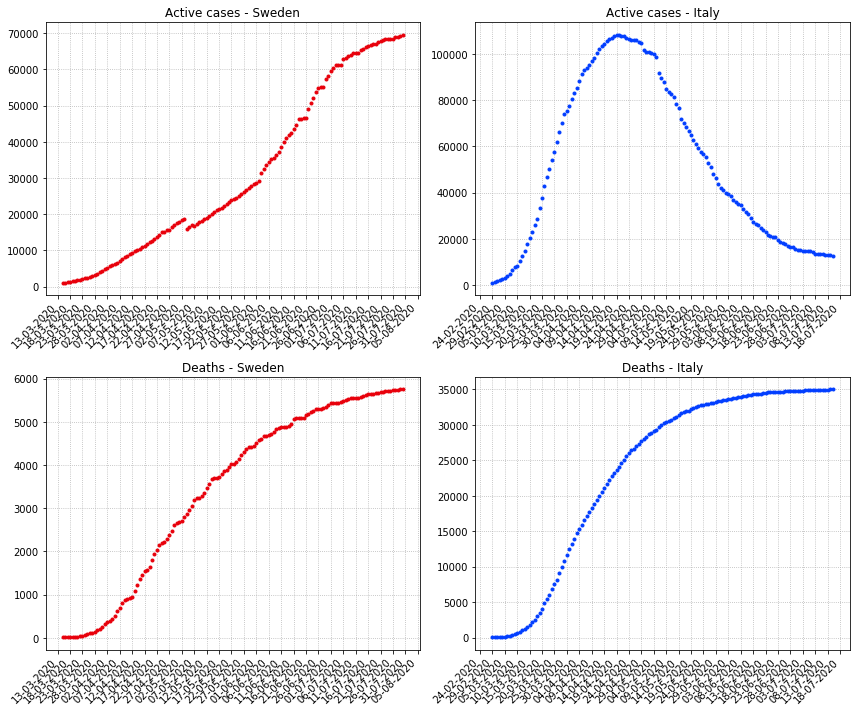

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

interval = 5
start = dt.date(2020, 3, 15)
end = start + dt.timedelta(days=len(sweden_active))
days = mdates.drange(start, end, dt.timedelta(days=1))

start = dt.date(2020, 2, 29)
end = start + dt.timedelta(days=len(italy_active))
days_it = mdates.drange(start, end, dt.timedelta(days=1))

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot(days, sweden_active, 'or', markersize=3)
ax1.set_title('Active cases - Sweden')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=interval))

ax2 = fig.add_subplot(222)
ax2.plot(days_it, italy_active, 'ob', markersize=3)
ax2.set_title('Active cases - Italy')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=interval))

ax3 = fig.add_subplot(223)
ax3.plot(days, sweden_d, 'or', markersize=3)
ax3.set_title('Deaths - Sweden')
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=interval))

ax4 = fig.add_subplot(224)
ax4.plot(days_it, italy_d, 'ob', markersize=3)
ax4.set_title('Deaths - Italy')
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax4.xaxis.set_major_locator(mdates.DayLocator(interval=interval))

sns.set_color_codes('bright')
for ax in fig.axes:
  for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
  ax.grid(linestyle='dotted')
fig.set_figheight(10)
fig.set_figwidth(12)
plt.tight_layout()
plt.show()

We then compare total cases, active cases and deaths for the two countries from March 2 (the first day reported for Sweden) until today:

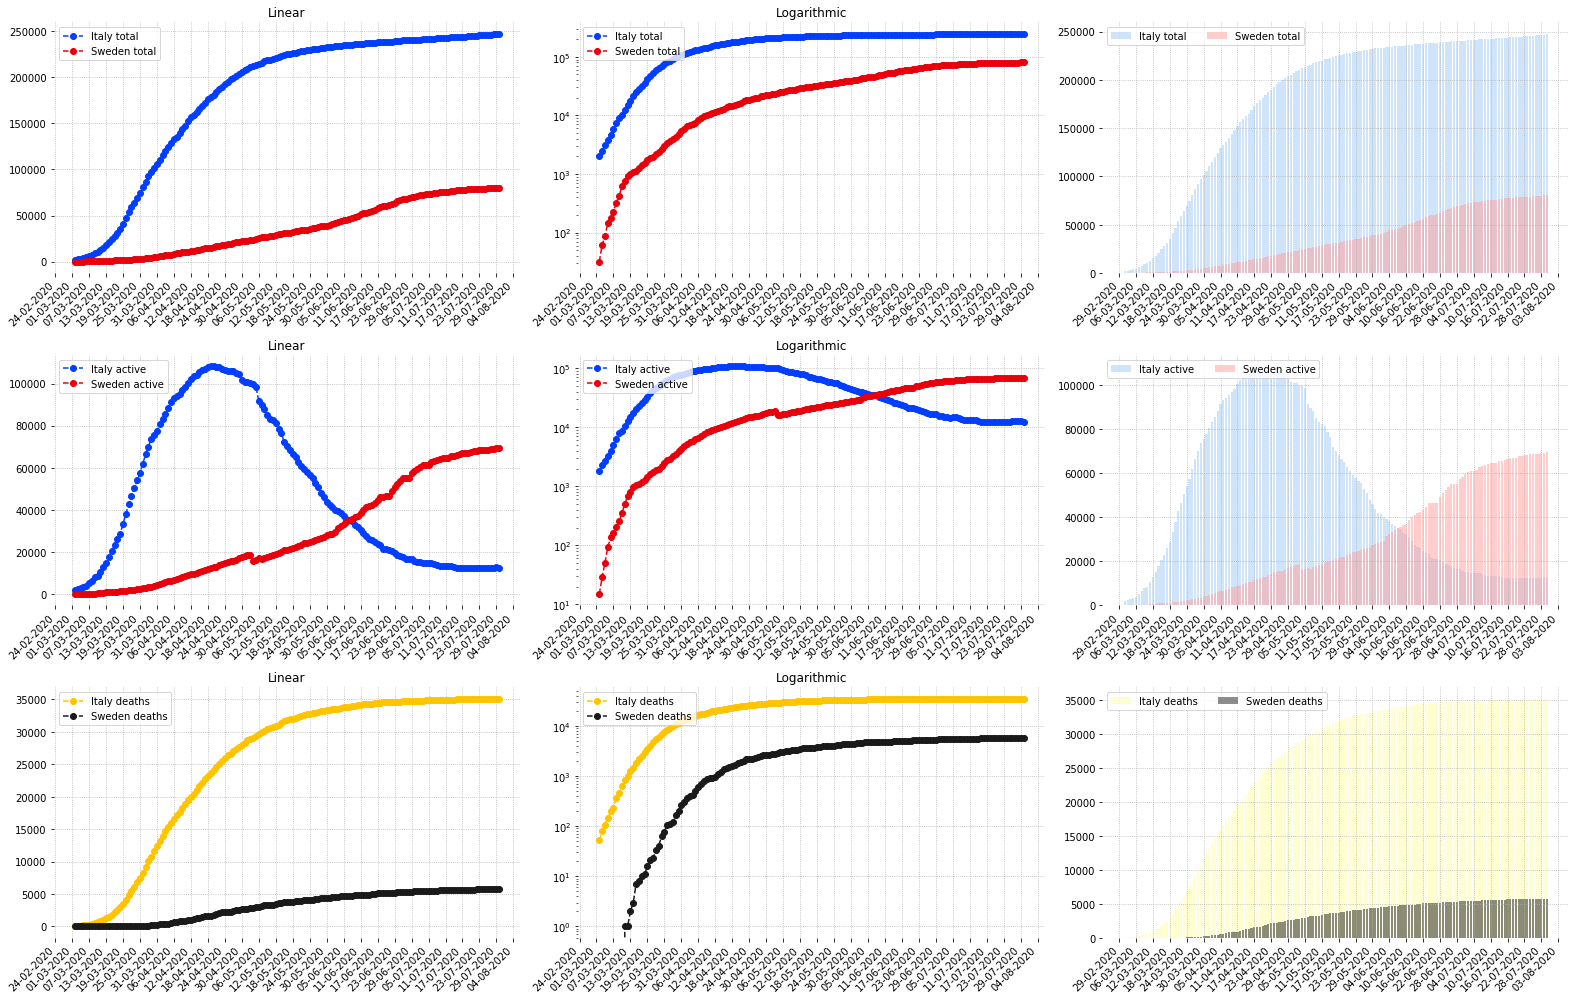

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt

italy_total = utils.load_italy_total(7)

sweden_total = utils.load_sweden_total(3)[1:]

italy_active = utils.load_italy_active(7)

sweden_active = np.concatenate((np.array([15, 29, 51, 93, 136, 160, 202, 259, 354, 498, 685, 812, 958]), sweden_active.copy()))

italy_d = utils.load_italy_deaths(7)

sweden_d = np.concatenate((np.array([0, 0, 0, 0, 0, 0, 0, 0, 0]), utils.load_sweden_deaths(0)[1:]))

start = dt.date(2020, 3, 2)
end = start + dt.timedelta(days=len(italy_active))
days = mdates.drange(start, end, dt.timedelta(days=1))


interval = 6
fig = plt.figure()
ax1 = fig.add_subplot(331)
ax1.plot(days, italy_total, '--bo', label='Italy total')
ax1.plot(days, sweden_total, '--ro', label='Sweden total')
ax1.legend(loc="upper left")
ax1.set_title('Linear')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax1.axes.grid(linestyle='dotted')

ax2 = fig.add_subplot(332)
ax2.plot(days, italy_total, '--bo', label='Italy total')
ax2.plot(days, sweden_total, '--ro', label='Sweden total')
ax2.legend(loc="upper left")
ax2.set_title('Logarithmic')
ax2.set_yscale('log')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax2.axes.grid(linestyle='dotted')

ax3 = fig.add_subplot(333)
sns.set_color_codes('pastel')
ax3.bar(days, italy_total, color='b', alpha=0.5, label='Italy total')
ax3.bar(days, sweden_total, color='r', alpha=0.5, label='Sweden total')
ax3.legend(ncol = 2, loc = 'upper left')
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=interval))

ax4 = fig.add_subplot(334)
ax4.plot(days, italy_active, '--bo', label='Italy active')
ax4.plot(days, sweden_active, '--ro', label='Sweden active')
ax4.legend(loc="upper left")
ax4.set_title('Linear')
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax4.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax4.axes.grid(linestyle='dotted')

ax5 = fig.add_subplot(335)
ax5.plot(days, italy_active, '--bo', label='Italy active')
ax5.plot(days, sweden_active, '--ro', label='Sweden active')
ax5.legend(loc="upper left")
ax5.set_title('Logarithmic')
ax5.set_yscale('log')
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax5.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax5.axes.grid(linestyle='dotted')

ax6 = fig.add_subplot(336)
sns.set_color_codes('pastel')
ax6.bar(days, italy_active, color='b', alpha=0.5, label='Italy active')
ax6.bar(days, sweden_active, color='r', alpha=0.5, label='Sweden active')
ax6.legend(ncol = 2, loc = 'upper left')
ax6.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax6.xaxis.set_major_locator(mdates.DayLocator(interval=interval))

ax7 = fig.add_subplot(337)
ax7.plot(days, italy_d, '--yo', label='Italy deaths')
ax7.plot(days, sweden_d, '--ko', label='Sweden deaths')
ax7.legend(loc="upper left")
ax7.set_title('Linear')
ax7.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax7.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax7.axes.grid(linestyle='dotted')

ax8 = fig.add_subplot(338)
ax8.plot(days, italy_d, '--yo', label='Italy deaths')
ax8.plot(days, sweden_d, '--ko', label='Sweden deaths')
ax8.legend(loc="upper left")
ax8.set_title('Logarithmic')
ax8.set_yscale('log')
ax8.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax8.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax8.axes.grid(linestyle='dotted')

ax9 = fig.add_subplot(339)
sns.set_color_codes('pastel')
ax9.bar(days, italy_d, color='y', alpha=0.5, label='Italy deaths')
ax9.bar(days, sweden_d, color='k', alpha=0.5, label='Sweden deaths')
ax9.legend(ncol = 2, loc = 'upper left')
ax9.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax9.xaxis.set_major_locator(mdates.DayLocator(interval=interval))

sns.set_color_codes('bright')
sns.despine(left = True, bottom = True)
for ax in fig.axes:
  for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
  ax.grid(linestyle='dotted')
fig.set_figheight(14)
fig.set_figwidth(22)
plt.tight_layout()
plt.show()

Then we see the total cases and deaths per 100k in the two countries:

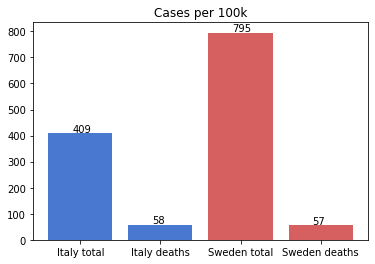

In [22]:
dict_100 = {'Italy total': italy_total[-1] / 60461826 * 100000, 'Italy deaths': italy_d[-1] / 60461826 * 100000,
            'Sweden total': sweden_total[-1] / 10099265 * 100000, 'Sweden deaths': sweden_d[-1] / 10099265 * 100000}

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(dict_100.keys(), dict_100.values(), color='bbrr')
for i, v in enumerate(dict_100.values()):
    ax.text(i - 0.1, v + 5, '{:.0f}'.format(v),  color='black')
ax.set_title('Cases per 100k')

plt.show()

We then make a comparison of total, active cases and deaths within the same country for the same time period:

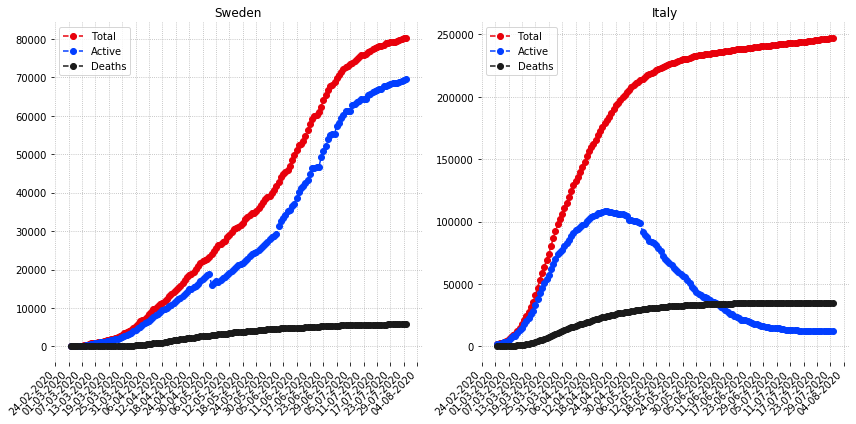

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt

start = dt.date(2020, 3, 2)
end = start + dt.timedelta(days=len(italy_active))
days = mdates.drange(start, end, dt.timedelta(days=1))


fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(days, sweden_total, '--ro', label='Total')
ax1.plot(days, sweden_active, '--bo', label='Active')
ax1.plot(days, sweden_d, '--ko', label='Deaths')
ax1.legend(loc="upper left")
ax1.set_title('Sweden')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax1.axes.grid(linestyle='dotted')

ax2 = fig.add_subplot(122)
ax2.plot(days, italy_total, '--ro', label='Total')
ax2.plot(days, italy_active, '--bo', label='Active')
ax2.plot(days, italy_d, '--ko', label='Deaths')
ax2.legend(loc="upper left")
ax2.set_title('Italy')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax2.axes.grid(linestyle='dotted')

sns.set_color_codes('bright')
sns.despine(left = True, bottom = True)
for ax in fig.axes:
  for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
fig.set_figheight(6)
fig.set_figwidth(12)
plt.tight_layout()
plt.show()

We then plot the daily increase or decrease for total and active cases and deaths during the same time period, as line chart and bar chart:

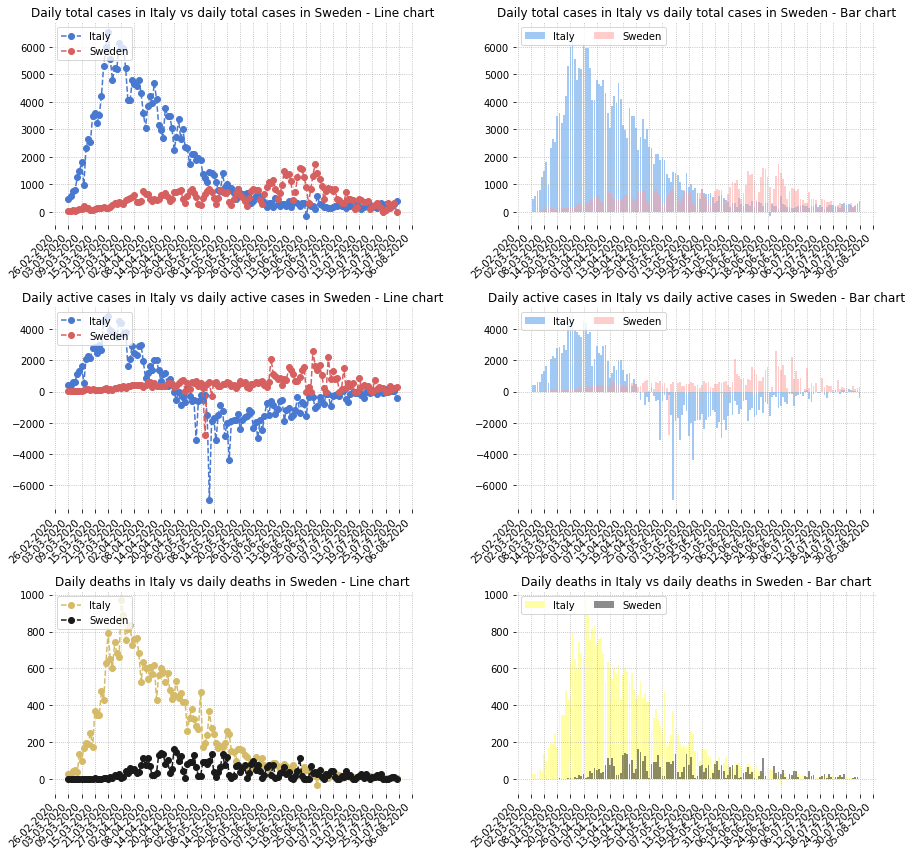

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt


it_tot_day = np.diff(italy_total)
swe_tot_day = np.diff(sweden_total)
it_act_day = np.diff(italy_active)
swe_active_day = np.diff(sweden_active)
it_d_day = np.diff(italy_d)
swe_d_day = np.diff(sweden_d)

start = dt.date(2020, 3, 3)
end = start + dt.timedelta(days=len(italy_active) - 1)
days = mdates.drange(start, end, dt.timedelta(days=1))

fig = plt.figure()
ax1 = fig.add_subplot(321)
ax1.plot(days, it_tot_day, '--bo', label='Italy')
ax1.plot(days, swe_tot_day, '--ro', label='Sweden')
ax1.legend(loc="upper left")
ax1.set_title('Daily total cases in Italy vs daily total cases in Sweden - Line chart')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax1.axes.grid(linestyle='dotted')

sns.set_color_codes('pastel')
ax2 = fig.add_subplot(322)

ax2.bar(days, it_tot_day, color='b', label='Italy')
ax2.bar(days, swe_tot_day, color='r', alpha=0.5, label='Sweden')
ax2.legend(ncol = 2, loc = 'upper left')
ax2.set_title('Daily total cases in Italy vs daily total cases in Sweden - Bar chart')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=interval))

ax3 = fig.add_subplot(323)
ax3.plot(days, it_act_day, '--bo', label='Italy')
ax3.plot(days, swe_active_day, '--ro', label='Sweden')
ax3.legend(loc="upper left")
ax3.set_title('Daily active cases in Italy vs daily active cases in Sweden - Line chart')
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax3.axes.grid(linestyle='dotted')

sns.set_color_codes('pastel')
ax4 = fig.add_subplot(324)

ax4.bar(days, it_act_day, color='b', label='Italy')
ax4.bar(days, swe_active_day, color='r', alpha=0.5, label='Sweden')
ax4.legend(ncol = 2, loc = 'upper left')
ax4.set_title('Daily active cases in Italy vs daily active cases in Sweden - Bar chart')
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax4.xaxis.set_major_locator(mdates.DayLocator(interval=interval))

ax5 = fig.add_subplot(325)
ax5.plot(days, it_d_day, '--yo', label='Italy')
ax5.plot(days, swe_d_day, '--ko', label='Sweden')
ax5.legend(loc="upper left")
ax5.set_title('Daily deaths in Italy vs daily deaths in Sweden - Line chart')
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax5.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax5.axes.grid(linestyle='dotted')

sns.set_color_codes('pastel')
ax6 = fig.add_subplot(326)

ax6.bar(days, it_d_day, color='y', label='Italy')
ax6.bar(days, swe_d_day, color='k', alpha=0.5, label='Sweden')
ax6.legend(ncol = 2, loc = 'upper left')
ax6.set_title('Daily deaths in Italy vs daily deaths in Sweden - Bar chart')
ax6.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax6.xaxis.set_major_locator(mdates.DayLocator(interval=interval))


sns.set_color_codes('muted')
sns.despine(left = True, bottom = True)
for ax in fig.axes:
  for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
  ax.grid(linestyle='dotted')
fig.set_figheight(12)
fig.set_figwidth(13)
plt.tight_layout()
plt.show()



We then plot the 7-day moving average of total, active and death cases starting March 8, by country.

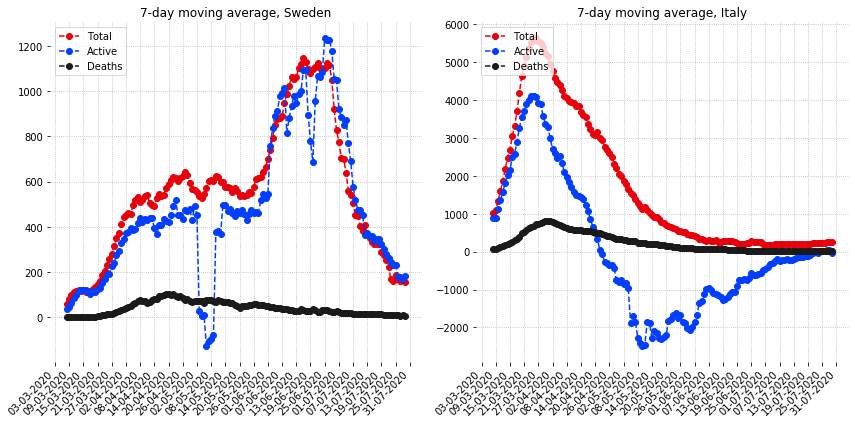

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt

it_tot_avg = [np.mean(it_tot_day[i - 6:i + 1]) for i in range(6, len(it_tot_day))]
it_act_avg = [np.mean(it_act_day[i - 6:i + 1]) for i in range(6, len(it_act_day))]
it_d_avg = [np.mean(it_d_day[i - 6:i + 1]) for i in range(6, len(it_d_day))]

swe_tot_avg = [np.mean(swe_tot_day[i - 6:i + 1]) for i in range(6, len(swe_tot_day))]
swe_act_avg = [np.mean(swe_active_day[i - 6:i + 1]) for i in range(6, len(swe_active_day))]
swe_d_avg = [np.mean(swe_d_day[i - 6:i + 1]) for i in range(6, len(swe_d_day))]

start = dt.date(2020, 3, 8)
end = start + dt.timedelta(days=len(it_act_avg))
days = mdates.drange(start, end, dt.timedelta(days=1))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(days, swe_tot_avg, '--ro', label='Total')
ax1.plot(days, swe_act_avg, '--bo', label='Active')
ax1.plot(days, swe_d_avg, '--ko', label='Deaths')
ax1.legend(loc="upper left")
ax1.set_title('7-day moving average, Sweden')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax1.axes.grid(linestyle='dotted')

ax2 = fig.add_subplot(122)
ax2.plot(days, it_tot_avg, '--ro', label='Total')
ax2.plot(days, it_act_avg, '--bo', label='Active')
ax2.plot(days, it_d_avg, '--ko', label='Deaths')
ax2.legend(loc="upper left")
ax2.set_title('7-day moving average, Italy')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax2.axes.grid(linestyle='dotted')

sns.set_color_codes('bright')
sns.despine(left = True, bottom = True)
for ax in fig.axes:
  for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
fig.set_figheight(6)
fig.set_figwidth(12)
plt.tight_layout()
plt.show()

We then compare the number of weekly total cases with the number of weekly total tests administered by both countries, from week 10 (starting March 2) to week 30 (ending July 26). On top of each total cases bar we set the percentage of total cases per number of tests.

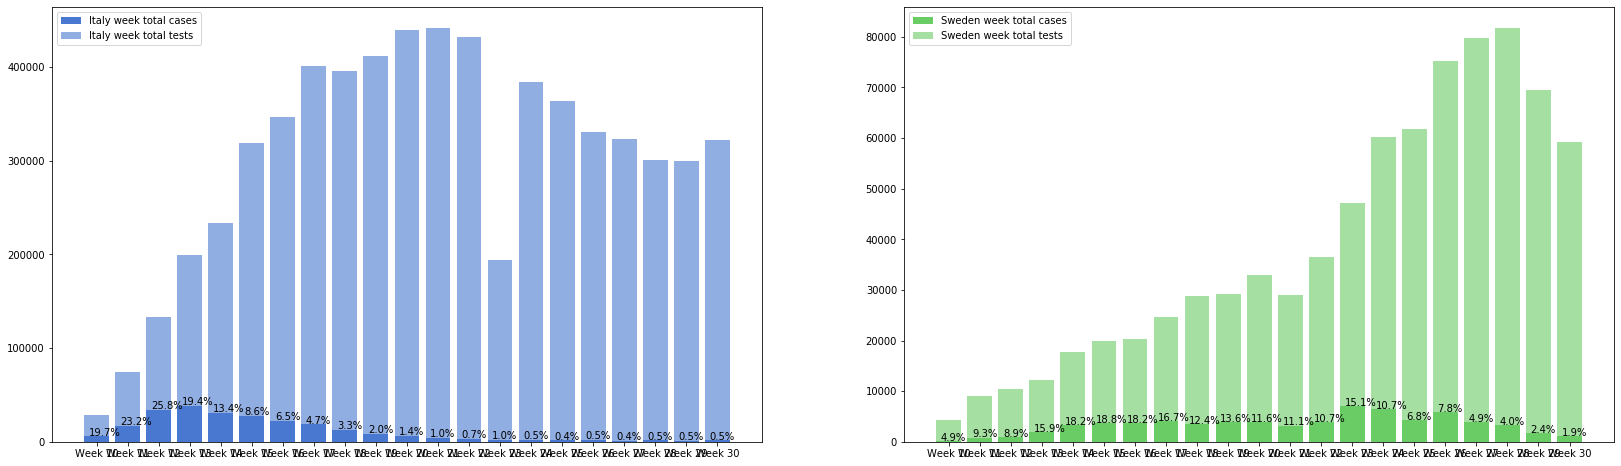

Week 30 tests per 100k population, Italy: 533.43
Week 30 tests per 100k population, Sweden: 585.62


In [9]:
import numpy as np
import matplotlib.pyplot as plt

swe_total_week = {'Week 10': 211, 'Week 11': 838, 'Week 12': 921,
                  'Week 13': 1959, 'Week 14': 3231, 'Week 15': 3740,
                  'Week 16': 3684, 'Week 17': 4093, 'Week 18': 3560,
                  'Week 19': 3969, 'Week 20': 3813, 'Week 21': 3206,
                  'Week 22': 3919, 'Week 23': 7109, 'Week 24': 6450,
                  'Week 25': 4236, 'Week 26': 5861, 'Week 27': 3885,
                  'Week 28': 3284, 'Week 29': 1677, 'Week 30': 1119}

swe_tests_week = {'Week 10': 4300, 'Week 11': 9000, 'Week 12': 10400,
                  'Week 13': 12300, 'Week 14': 17800, 'Week 15': 19900,
                  'Week 16': 20233, 'Week 17': 24560, 'Week 18': 28802,
                  'Week 19': 29129, 'Week 20': 33003, 'Week 21': 28986,
                  'Week 22': 36466, 'Week 23': 47080, 'Week 24': 60296,
                  'Week 25': 61842, 'Week 26': 75151, 'Week 27': 79811,
                  'Week 28': 81801, 'Week 29': 69393, 'Week 30': 59143}

it_total_week = {'Week 10': 5681, 'Week 11': 17372, 'Week 12': 34390,
                 'Week 13': 38552, 'Week 14': 31259, 'Week 15': 27415,
                 'Week 16': 22609, 'Week 17': 18703, 'Week 18': 13042,
                 'Week 19': 8353, 'Week 20': 6365, 'Week 21': 4423,
                 'Week 22': 3139, 'Week 23': 1979, 'Week 24': 1991,
                 'Week 25': 1510, 'Week 26': 1811, 'Week 27': 1301,
                 'Week 28': 1450, 'Week 29': 1373, 'Week 30': 1684}

it_tests_week = {'Week 10': 28810, 'Week 11': 74962, 'Week 12': 133503,
                'Week 13': 199128, 'Week 14': 233931, 'Week 15': 318732,
                'Week 16': 346348, 'Week 17': 401118, 'Week 18': 396113,
                'Week 19': 412140, 'Week 20': 439048, 'Week 21': 442052,
                'Week 22': 431727, 'Week 23': 193567, 'Week 24': 384183,
                'Week 25': 363652, 'Week 26': 330249, 'Week 27': 323669,
                'Week 28': 300523, 'Week 29': 299238, 'Week 30': 322523}

it_w_percent = []
for k, v in it_total_week.items():
  it_w_percent.append((v / it_tests_week[k]) * 100)

swe_w_percent = []
for k, v in swe_total_week.items():
  swe_w_percent.append((v / swe_tests_week[k]) * 100)


fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.bar(it_total_week.keys(), it_total_week.values(), color='b', label='Italy week total cases')
ax1.bar(it_tests_week.keys(), it_tests_week.values(), color='b', label='Italy week total tests', alpha= 0.6)
for i, v in enumerate(it_w_percent):
    ax1.text(i - 0.25, list(it_total_week.values())[i] + 1000, '{:.1f}%'.format(v),  color='black')
ax1.legend(loc="upper left")

ax2 = fig.add_subplot(122)
ax2.bar(swe_total_week.keys(), swe_total_week.values(), color='g', label='Sweden week total cases')
ax2.bar(swe_tests_week.keys(), swe_tests_week.values(), color='g', label='Sweden week total tests', alpha= 0.6)
for i, v in enumerate(swe_w_percent):
    ax2.text(i - 0.25, list(swe_total_week.values())[i] + 70, '{:.1f}%'.format(v),  color='black')
ax2.legend(loc="upper left")

fig.set_figheight(8)
fig.set_figwidth(28)
plt.show()

print("Week 30 tests per 100k population, Italy: {0:.2f}".format((it_tests_week['Week 30'] / 60461826) * 100000))
print("Week 30 tests per 100k population, Sweden: {0:.2f}".format((swe_tests_week['Week 30'] / 10099265) * 100000))

We then compare the total cases and deaths by age and gender for both countries. The first row reports the absolute number of total cases and displays the percentage over total cases for that age/gender group. 
The second row reports the absolute number of deaths and displays the percentage over total deaths for that age/gender group. 
The third row reports the percentage of deaths over total cases for that age/gender group.

The unknown column refers to age. Data last updated on July 21 for Italy [1] and July 29 for Sweden [2].

Below them, graphs show the compared percentages of elderly cases and deaths on total cases and deaths in both countries, and the death rate from February 20 to March 31 (Italy) [3] and from March 15 to April 24 (Sweden) [4] in 2020 vs the average death rate in the same time period for 2015-2019. The last graph also shows the percentage increase between 2020 and the 2015-2019 average over a longer time span for Italy (first quarter of the year) and Sweden (February 23 - June 23).

[1] [Istituto Superiore di Sanità - Sorveglianza integrata COVID-19](https://www.epicentro.iss.it/coronavirus/sars-cov-2-sorveglianza-dati)

[2] [Folkhälsomyndigheten - Bekräftade fall i Sverige – daglig uppdatering](https://www.folkhalsomyndigheten.se/smittskydd-beredskap/utbrott/aktuella-utbrott/covid-19/bekraftade-fall-i-sverige/)

[3] [Rapporto ISTAT](https://www.epicentro.iss.it/coronavirus/pdf/Rapp_Istat_Iss_3Giugno.pdf)

[4] [Statistics Sweden to publish preliminary statistics on deaths in Sweden](https://www.scb.se/en/About-us/news-and-press-releases/statistics-sweden-to-publish-preliminary-statistics-on-deaths-in-sweden/)

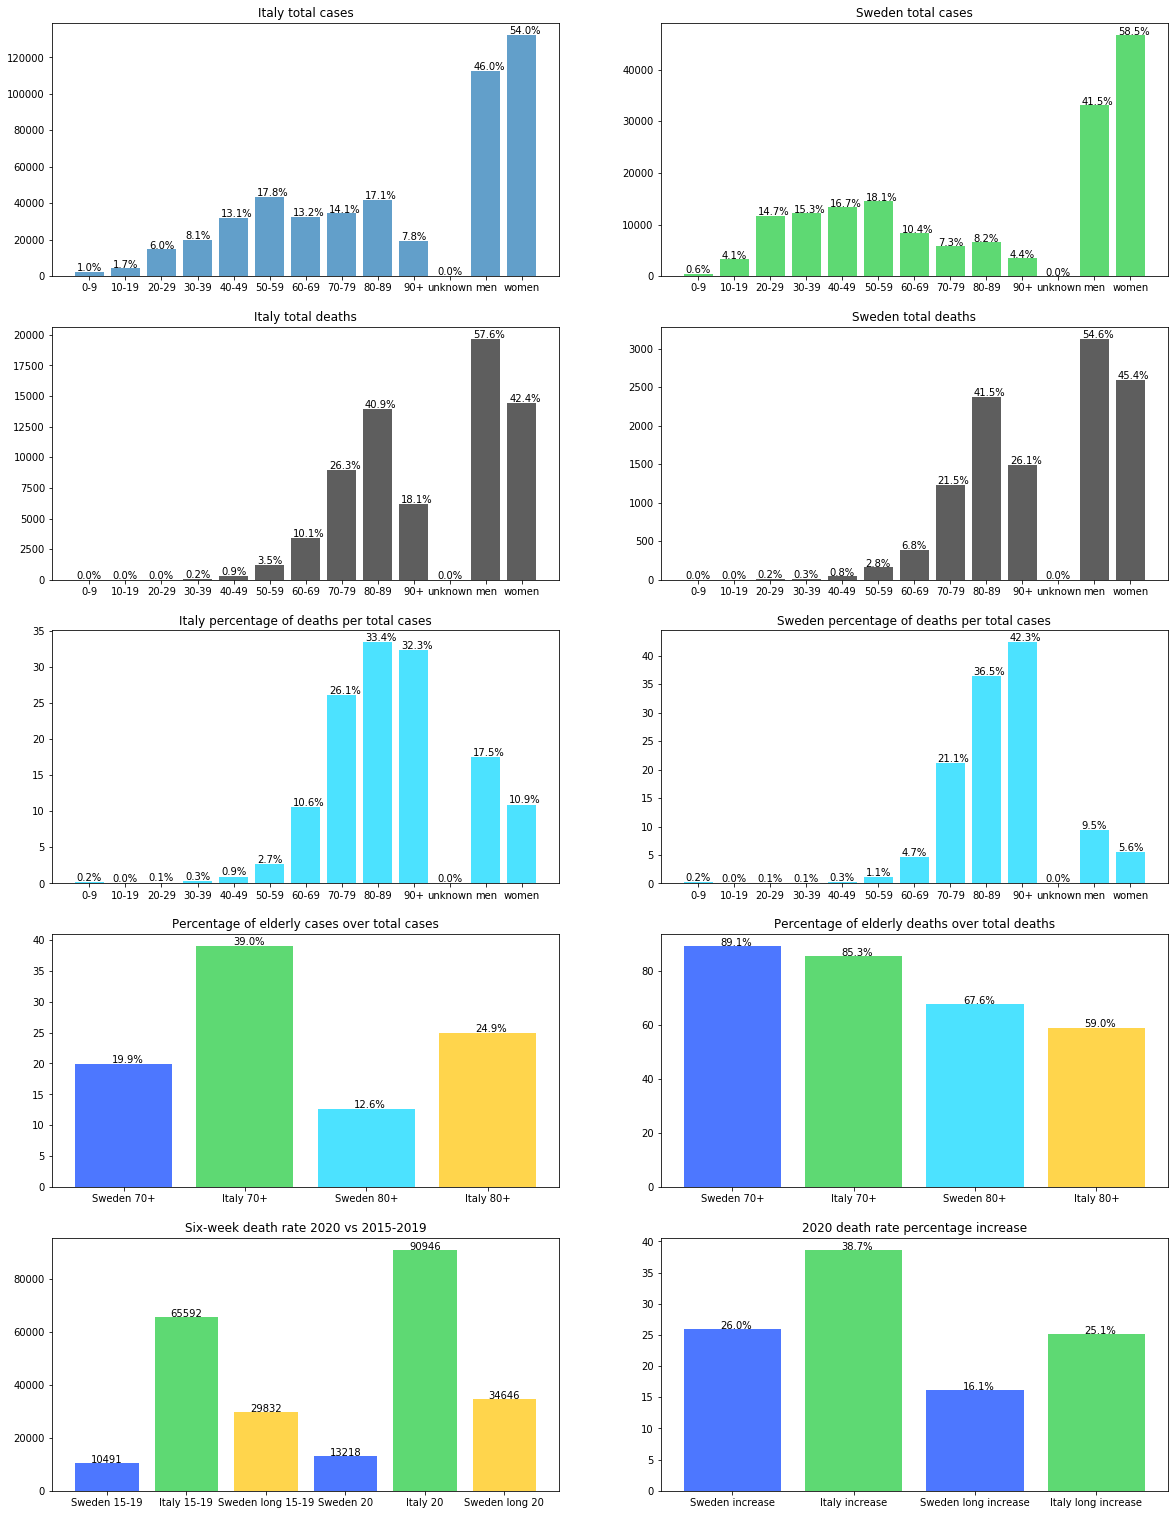

In [28]:
import numpy as np
import matplotlib.pyplot as plt

it_tot_age = {'0-9': 2428, '10-19': 4218, '20-29': 14671, '30-39': 19825,
              '40-49': 32131, '50-59': 43608, '60-69': 32417, '70-79': 34437,
              '80-89': 41769, '90+': 19179, 'unknown': 25, 'total': 244708}

it_d_age = {'0-9': 4, '10-19': 0, '20-29': 16, '30-39': 66,
            '40-49': 303, '50-59': 1185, '60-69': 3433, '70-79': 8988,
            '80-89': 13941, '90+': 6190, 'unknown': 0, 'total': 34126}

swe_tot_age = {'0-9': 499, '10-19': 3300, '20-29': 11702, '30-39': 12230,
              '40-49': 13356, '50-59': 14459, '60-69': 8309, '70-79': 5853,
              '80-89': 6528, '90+': 3527, 'unknown': 19, 'total': 79782}

swe_d_age = {'0-9': 1, '10-19': 0, '20-29': 9, '30-39': 16,
             '40-49': 45, '50-59': 160, '60-69': 392, '70-79': 1234,
             '80-89': 2380, '90+': 1493, 'unknown': 0, 'total': 5730}

it_tot_gender = {'men': 112477, 'women': 132212, 'total': 244708}

it_d_gender = {'men': 19672, 'women': 14454, 'total': 34126}

swe_tot_gender = {'men': 33095, 'women': 46683, 'total': 79782}

swe_d_gender = {'men': 3131, 'women': 2599, 'total': 5730}

it_t_age_percent = []
for k, v in it_tot_age.items():
  if k is not 'total':
    it_t_age_percent.append((v / it_tot_age['total']) * 100)

it_d_age_percent = []
for k, v in it_d_age.items():
  if k is not 'total':
    it_d_age_percent.append((v / it_d_age['total']) * 100)

swe_t_age_percent = []
for k, v in swe_tot_age.items():
  if k is not 'total':
    swe_t_age_percent.append((v / swe_tot_age['total']) * 100)

swe_d_age_percent = []
for k, v in swe_d_age.items():
  if k is not 'total':
    swe_d_age_percent.append((v / swe_d_age['total']) * 100)

it_t_gender_percent = []
for k, v in it_tot_gender.items():
  if k is not 'total':
    it_t_gender_percent.append((v / it_tot_gender['total']) * 100)

it_d_gender_percent = []
for k, v in it_d_gender.items():
  if k is not 'total':
    it_d_gender_percent.append((v / it_d_gender['total']) * 100)

swe_t_gender_percent = []
for k, v in swe_tot_gender.items():
  if k is not 'total':
    swe_t_gender_percent.append((v / swe_tot_gender['total']) * 100)

swe_d_gender_percent = []
for k, v in swe_d_gender.items():
  if k is not 'total':
    swe_d_gender_percent.append((v / swe_d_gender['total']) * 100)

it_dp_age_percent = []
for k, v in it_d_age.items():
  if k is not 'total':
    it_dp_age_percent.append((v / it_tot_age[k]) * 100)

it_dp_gender_percent = []
for k, v in it_d_gender.items():
  if k is not 'total':
    it_dp_gender_percent.append((v / it_tot_gender[k]) * 100)

swe_dp_age_percent = []
for k, v in swe_d_age.items():
  if k is not 'total':
    swe_dp_age_percent.append((v / swe_tot_age[k]) * 100)

swe_dp_gender_percent = []
for k, v in swe_d_gender.items():
  if k is not 'total':
    swe_dp_gender_percent.append((v / swe_tot_gender[k]) * 100)

for el in it_t_gender_percent:
  it_t_age_percent.append(el)

for el in it_d_gender_percent:
  it_d_age_percent.append(el)

for el in swe_t_gender_percent:
  swe_t_age_percent.append(el)

for el in swe_d_gender_percent:
  swe_d_age_percent.append(el)

for el in it_dp_gender_percent:
  it_dp_age_percent.append(el)

for el in swe_dp_gender_percent:
  swe_dp_age_percent.append(el)

old_percents = {}

old_percents['Sweden 70+'] = swe_d_age_percent[-6] + swe_d_age_percent[-5] + swe_d_age_percent[-4]
old_percents['Italy 70+'] = it_d_age_percent[-6] + it_d_age_percent[-5] + it_d_age_percent[-4]

old_percents['Sweden 80+'] = old_percents['Sweden 70+'] - swe_d_age_percent[-6]
old_percents['Italy 80+'] = old_percents['Italy 70+'] - it_d_age_percent[-6]

tot_old_percents = {}

tot_old_percents['Sweden 70+'] = swe_t_age_percent[-6] + swe_t_age_percent[-5] + swe_t_age_percent[-4]
tot_old_percents['Italy 70+'] = it_t_age_percent[-6] + it_t_age_percent[-5] + it_t_age_percent[-4]

tot_old_percents['Sweden 80+'] = tot_old_percents['Sweden 70+'] - swe_t_age_percent[-6]
tot_old_percents['Italy 80+'] = tot_old_percents['Italy 70+'] - it_t_age_percent[-6]

yearly = {}

yearly['Sweden 15-19'] = 10491
yearly['Italy 15-19'] = 65592
yearly['Sweden long 15-19'] = 29832


yearly['Sweden 20'] = 13218
yearly['Italy 20'] = 90946
yearly['Sweden long 20'] = 34646

yearly_increase = {}

yearly_increase['Sweden increase'] = (yearly['Sweden 20'] - yearly['Sweden 15-19']) / yearly['Sweden 15-19'] * 100
yearly_increase['Italy increase'] = (yearly['Italy 20'] - yearly['Italy 15-19']) / yearly['Italy 15-19'] * 100
yearly_increase['Sweden long increase'] = (yearly['Sweden long 20'] - yearly['Sweden long 15-19']) \
                                          / yearly['Sweden long 15-19'] * 100
yearly_increase['Italy long increase'] = 25.13

it_tot_age.pop('total')
it_d_age.pop('total')
swe_tot_age.pop('total')
swe_d_age.pop('total')
it_tot_gender.pop('total')
it_d_gender.pop('total')
swe_tot_gender.pop('total')
swe_d_gender.pop('total')

it_tot_age['men'] = it_tot_gender['men']
it_tot_age['women'] = it_tot_gender['women']
it_d_age['men'] = it_d_gender['men']
it_d_age['women'] = it_d_gender['women']
swe_tot_age['men'] = swe_tot_gender['men']
swe_tot_age['women'] = swe_tot_gender['women']
swe_d_age['men'] = swe_d_gender['men']
swe_d_age['women'] = swe_d_gender['women']

fig = plt.figure()
sns.set_color_codes('bright')
ax1 = fig.add_subplot(521)
ax1.bar(it_tot_age.keys(), it_tot_age.values(), alpha=0.7,)
for i, v in enumerate(it_t_age_percent):
    ax1.text(i - 0.35,  list(it_tot_age.values())[i] + 500, '{:.1f}%'.format(v),  color='black')
ax1.set_title('Italy total cases')

ax2 = fig.add_subplot(522)
ax2.bar(swe_tot_age.keys(), swe_tot_age.values(), color='g', alpha=0.7,)
for i, v in enumerate(swe_t_age_percent):
    ax2.text(i - 0.35, list(swe_tot_age.values())[i] + 100, '{:.1f}%'.format(v),  color='black')
ax2.set_title('Sweden total cases')

ax3 = fig.add_subplot(523)
ax3.bar(it_d_age.keys(), it_d_age.values(), color='k', alpha=0.7)
for i, v in enumerate(it_d_age_percent):
    ax3.text(i - 0.35, list(it_d_age.values())[i] + 100, '{:.1f}%'.format(v),  color='black')
ax3.set_title('Italy total deaths')

ax4 = fig.add_subplot(524)
ax4.bar(swe_d_age.keys(), swe_d_age.values(), color='k', alpha=0.7)
for i, v in enumerate(swe_d_age_percent):
    ax4.text(i - 0.35, list(swe_d_age.values())[i] + 10, '{:.1f}%'.format(v),  color='black')
ax4.set_title('Sweden total deaths')


ax5 = fig.add_subplot(525)
ax5.bar(it_d_age.keys(), it_dp_age_percent, color='c', alpha=0.7)
for i, v in enumerate(it_dp_age_percent):
    ax5.text(i - 0.35, it_dp_age_percent[i] + 0.2, '{:.1f}%'.format(v),  color='black')
ax5.set_title('Italy percentage of deaths per total cases')


ax6 = fig.add_subplot(526)
ax6.bar(swe_d_age.keys(), swe_dp_age_percent, color='c', alpha=0.7)
for i, v in enumerate(swe_dp_age_percent):
    ax6.text(i - 0.35, swe_dp_age_percent[i] + 0.2, '{:.1f}%'.format(v),  color='black')
ax6.set_title('Sweden percentage of deaths per total cases')

ax7 = fig.add_subplot(527)
ax7.bar(tot_old_percents.keys(), tot_old_percents.values(), color=list('bgcy'), alpha=0.7)
for i, v in enumerate(tot_old_percents.values()):
    ax7.text(i - 0.1, v + 0.2, '{:.1f}%'.format(v),  color='black')
ax7.set_title('Percentage of elderly cases over total cases')

ax8 = fig.add_subplot(528)
ax8.bar(old_percents.keys(), old_percents.values(), color=list('bgcy'), alpha=0.7)
for i, v in enumerate(old_percents.values()):
    ax8.text(i - 0.1, v + 0.2, '{:.1f}%'.format(v),  color='black')
ax8.set_title('Percentage of elderly deaths over total deaths')

ax9 = fig.add_subplot(529)
ax9.bar(yearly.keys(), yearly.values(), color=list('bgy'), alpha=0.7)
for i, v in enumerate(yearly.values()):
    ax9.text(i - 0.2, v, '{0}'.format(v),  color='black')
ax9.set_title('Six-week death rate 2020 vs 2015-2019')

ax10 = fig.add_subplot(5, 2, 10)
ax10.bar(yearly_increase.keys(), yearly_increase.values(), color=list('bg'), alpha=0.7)
for i, v in enumerate(yearly_increase.values()):
    ax10.text(i - 0.1, v, '{:.1f}%'.format(v),  color='black')
ax10.set_title('2020 death rate percentage increase')

fig.set_figheight(27)
fig.set_figwidth(20)
plt.show()

We then compare the swedish trend to the trend of active cases in Lombardy (10 million inhabitants), Emilia-Romagna (4.4 million inhabitants) and Veneto (4.9 million inhabitants), respectively the first, second and fifth region by number of active cases. Piedmont is third and Lazio is fourth. The daily increase or decrease of active cases and the 7-day moving average are also compared.

The cases start from March 8, first day of Italy reporting active cases by region. This is in the attempt to distinguish italian trends from the trend of Lombardy, which was particularly severe. 

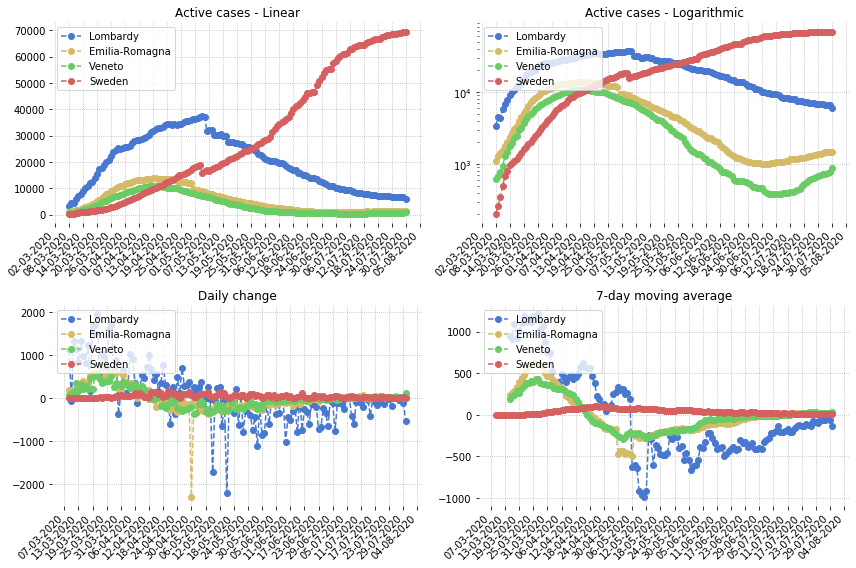

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt

lom_act = utils.load_lombardy_active(13)
er_act = utils.load_emilia_active(13)
ve_act = utils.load_veneto_active(13)
sweden_act = sweden_active.copy()[6:]

lom_day = np.diff(lom_act)
er_day = np.diff(er_act)
ve_day = np.diff(ve_act)

lom_avg = [np.mean(lom_day[i - 6:i + 1]) for i in range(6, len(lom_day))]
er_avg = [np.mean(er_day[i - 6:i + 1]) for i in range(6, len(er_day))]
ve_avg = [np.mean(ve_day[i - 6:i + 1]) for i in range(6, len(ve_day))]

start = dt.date(2020, 3, 8)
end = start + dt.timedelta(days=len(lom_act))
days = mdates.drange(start, end, dt.timedelta(days=1))

idx = np.argmin(lom_day)
lom_day[idx] = 0

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot(days, lom_act, '--bo', label='Lombardy')
ax1.plot(days, er_act, '--yo', label='Emilia-Romagna')
ax1.plot(days, ve_act, '--go', label='Veneto')
ax1.plot(days, sweden_act, '--ro', label='Sweden')
ax1.legend(loc="upper left")
ax1.set_title('Active cases - Linear')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax1.axes.grid(linestyle='dotted')

ax2 = fig.add_subplot(222)
ax2.plot(days, lom_act, '--bo', label='Lombardy')
ax2.plot(days, er_act, '--yo', label='Emilia-Romagna')
ax2.plot(days, ve_act, '--go', label='Veneto')
ax2.plot(days, sweden_act, '--ro', label='Sweden')
ax2.legend(loc="upper left")
ax2.set_title('Active cases - Logarithmic')
ax2.set_yscale('log')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax2.axes.grid(linestyle='dotted')

ax3 = fig.add_subplot(223)
ax3.plot(days[1:], lom_day, '--bo', label='Lombardy')
ax3.plot(days[1:], er_day, '--yo', label='Emilia-Romagna')
ax3.plot(days[1:], ve_day, '--go', label='Veneto')
ax3.plot(days[1:], swe_d_day[6:], '--ro', label='Sweden')
ax3.legend(loc="upper left")
ax3.set_title('Daily change')
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax3.axes.grid(linestyle='dotted')

ax4 = fig.add_subplot(224)
ax4.plot(days[7:], lom_avg, '--bo', label='Lombardy')
ax4.plot(days[7:], er_avg, '--yo', label='Emilia-Romagna')
ax4.plot(days[7:], ve_avg, '--go', label='Veneto')
ax4.plot(days[1:], swe_d_avg, '--ro', label='Sweden')
ax4.legend(loc="upper left")
ax4.set_title('7-day moving average')
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax4.xaxis.set_major_locator(mdates.DayLocator(interval=interval))
ax4.axes.grid(linestyle='dotted')

sns.set_color_codes('muted')
sns.despine(left = True, bottom = True)
for ax in fig.axes:
  for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)
fig.set_figheight(8)
fig.set_figwidth(12)
plt.tight_layout()
plt.show()

We then plot a pie chart by absolute number of total cases by region (Italy) and by county (Sweden). We then do the same by cases/10000 population, instead of absolute numbers. 

We also compare in a bar chart the percentage of cases by population for the italian regions and the 20 most affected swedish counties (all counties except Kalmar).

The data are for April 1, April 10, April 22 and April 30.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import shuffle

italy_reg_1 = {'Valle d\'Aosta': 631, 'Piedmont': 9795, 'Liguria': 3660,
             'Lombardy': 44773, 'Trentino-Alto Adige': 3288, 'Veneto': 9625,
             'Friuli-Venezia Giulia': 1685, 'Emilia-Romagna': 14787, 'Tuscany': 4867,
             'Marche': 3962, 'Umbria': 1095, 'Lazio': 3264, 'Abruzzo': 1436,
             'Molise': 160, 'Campania': 2231, 'Basilicata': 237, 
             'Apulia': 1946, 'Calabria': 669, 'Sicily': 1718, 'Sardinia': 745}
             
italy_reg_10 = {'Valle d\'Aosta': 879, 'Piedmont': 15012, 'Liguria': 5191,
             'Lombardy': 56048, 'Trentino-Alto Adige': 4771, 'Veneto': 13421,
             'Friuli-Venezia Giulia': 2349, 'Emilia-Romagna': 19128, 'Tuscany': 6727,
             'Marche': 5084, 'Umbria': 1302, 'Lazio': 4583, 'Abruzzo': 2014,
             'Molise': 243, 'Campania': 3442, 'Basilicata': 308, 
             'Apulia': 2809, 'Calabria': 901, 'Sicily': 2302, 'Sardinia': 1063}

italy_reg_22 = {'Valle d\'Aosta': 1095, 'Piedmont': 22739, 'Liguria': 6918,
             'Lombardy': 69092, 'Trentino-Alto Adige': 6062, 'Veneto': 16738,
             'Friuli-Venezia Giulia': 2817, 'Emilia-Romagna': 23434, 'Tuscany': 8700,
             'Marche': 5924, 'Umbria': 1357, 'Lazio': 5975, 'Abruzzo': 2733,
             'Molise': 284, 'Campania': 4185, 'Basilicata': 354, 
             'Apulia': 3730, 'Calabria': 1060, 'Sicily': 2883, 'Sardinia': 1247}

italy_reg_30 = {'Valle d\'Aosta': 1128, 'Piedmont': 26289, 'Liguria': 7993,
             'Lombardy': 75732, 'Trentino-Alto Adige': 6634, 'Veneto': 17960,
             'Friuli-Venezia Giulia': 3025, 'Emilia-Romagna': 25436, 'Tuscany': 9352,
             'Marche': 6247, 'Umbria': 1392, 'Lazio': 6616, 'Abruzzo': 2930,
             'Molise': 298, 'Campania': 4423, 'Basilicata': 367, 
             'Apulia': 4072, 'Calabria': 1108, 'Sicily': 3166, 'Sardinia': 1295}

italy_pop = {'Valle d\'Aosta': 125332, 'Piedmont': 4356406, 'Liguria': 1550640,
             'Lombardy': 10078012, 'Trentino-Alto Adige': 1074524, 'Veneto': 4905854,
             'Friuli-Venezia Giulia': 1215220, 'Emilia-Romagna': 4459477, 'Tuscany': 3729641,
             'Marche': 1522608, 'Umbria': 879337, 'Lazio': 5867097, 'Abruzzo': 1304970,
             'Molise': 302931, 'Campania': 5772625, 'Basilicata': 559084, 
             'Apulia': 4012310, 'Calabria': 1935414, 'Sicily': 4969147, 'Sardinia': 1632892}

swe_reg_1 = {'Stockholm': 2224, 'Östergötland': 464, 'Västra Götaland': 427,
           'Skåne': 291, 'Sörmland': 276, 'Uppsala': 194, 'Jönköping': 142,
           'Örebro': 139, 'Dalarna': 125, 'Halland': 104, 'Gävleborg': 101,
           'Västmanland': 88, 'Jämtland': 86, 'Norrbotten': 65,
           'Västerbotten': 63, 'Västernorrland': 55, 'Värmland': 50,
           'Kronoberg': 39, 'Kalmar': 38, 'Blekinge': 26, 'Gotland': 11}

swe_reg_10 = {'Stockholm': 4061, 'Östergötland': 948, 'Västra Götaland': 902,
            'Sörmland': 597, 'Uppsala': 431, 'Skåne': 405, 'Örebro': 334, 
            'Jönköping': 317, 'Dalarna': 296, 'Västmanland': 273, 'Gävleborg': 245,
            'Halland': 175, 'Västerbotten': 169, 'Norrbotten': 128, 'Jämtland': 115, 
            'Västernorrland': 92, 'Kronoberg': 82, 'Värmland': 70,
            'Kalmar': 64, 'Blekinge': 39, 'Gotland': 17}

swe_reg_22 = {'Stockholm': 6401, 'Västra Götaland': 1667, 'Östergötland': 1295, 
            'Sörmland': 944, 'Uppsala': 739, 'Örebro': 720, 'Västmanland': 589, 
            'Skåne': 575, 'Jönköping': 560, 'Dalarna': 546, 'Gävleborg': 443,
            'Halland': 268, 'Västerbotten': 249, 'Jämtland': 234, 'Norrbotten': 210,  
             'Kronoberg': 198, 'Västernorrland': 154, 'Värmland': 118,
            'Kalmar': 115, 'Blekinge': 48, 'Gotland': 20}

swe_reg_30 = {'Stockholm': 8033, 'Västra Götaland': 2459, 'Östergötland': 1476,
            'Sörmland': 1215, 'Örebro': 1022, 'Uppsala': 992, 'Dalarna': 798,
            'Skåne': 789, 'Jönköping': 772, 'Västmanland': 766, 'Gävleborg': 571,
            'Halland': 367, 'Jämtland': 345, 'Västerbotten': 322, 'Kronoberg': 311,
            'Norrbotten': 259, 'Västernorrland': 238, 'Värmland': 179,
            'Kalmar': 167, 'Blekinge': 73, 'Gotland': 46}

swe_pop = {'Stockholm': 2377081, 'Östergötland': 465495, 'Västra Götaland': 1725881,
           'Skåne': 1375278, 'Sörmland': 297540, 'Uppsala': 383713, 'Jönköping': 130810,
           'Örebro': 304805, 'Dalarna': 287966, 'Halland': 333848, 'Gävleborg': 287382,
           'Västmanland': 275845, 'Jämtland': 130810, 'Norrbotten': 250093,
           'Västerbotten': 271736, 'Västernorrland': 245347, 'Värmland': 282414,
           'Kronoberg': 201469, 'Kalmar': 245446, 'Blekinge': 159606, 'Gotland': 59686}

italy_percent_1 = {}
swe_percent_1 = {}
italy_percent_10 = {}
swe_percent_10 = {}
italy_percent_22 = {}
swe_percent_22 = {}
italy_percent_30 = {}
swe_percent_30 = {}

for key, value in italy_reg_1.items():
  italy_percent_1[key] = (value / italy_pop[key]) * 10000

for key, value in swe_reg_1.items():
  swe_percent_1[key] = (value / swe_pop[key]) * 10000

for key, value in italy_reg_10.items():
  italy_percent_10[key] = (value / italy_pop[key]) * 10000

for key, value in swe_reg_10.items():
  swe_percent_10[key] = (value / swe_pop[key]) * 10000

for key, value in italy_reg_22.items():
  italy_percent_22[key] = (value / italy_pop[key]) * 10000

for key, value in swe_reg_22.items():
  swe_percent_22[key] = (value / swe_pop[key]) * 10000

for key, value in italy_reg_30.items():
  italy_percent_30[key] = (value / italy_pop[key]) * 10000

for key, value in swe_reg_30.items():
  swe_percent_30[key] = (value / swe_pop[key]) * 10000


def plot(cmp1, data1, cmp2, data2):
  # From: https://gist.github.com/vals/5257113
  cmap = cmp1
  slices = [1,2,3] * 4 + [20, 25, 30] * 2
  shuffle(slices)
  slices = sorted(slices)
  small = slices[int(len(slices) / 2):]
  large = slices[:int(len(slices) / 2)]
  colors = cmap(np.arange(len(data1))/ len(data1))

  fig = plt.figure(figsize=[10, 10])
  ax1 = fig.add_subplot(121)
  angle = 180 + float(sum(large[::2])) / sum(data1.values()) * 360
  pie_wedge_collection = ax1.pie(data1.values(), colors=colors, labels=data1.keys(), 
                                 labeldistance=1.1, rotatelabels=True, startangle=angle)
  for pie_wedge in pie_wedge_collection[0]:
      pie_wedge.set_edgecolor('white')

  cmap = cmp2
  colors = cmap(np.arange(len(data2))/ len(data2))
  ax2 = fig.add_subplot(122)
  angle = 180 + float(sum(large[::2])) / sum(data2.values()) * 360
  pie_wedge_collection = ax2.pie(data2.values(), colors=colors, labels=data2.keys(), 
                                 labeldistance=1.1, rotatelabels=True, startangle=angle)

  for pie_wedge in pie_wedge_collection[0]:
      pie_wedge.set_edgecolor('white')

  fig.set_figwidth(14)
  plt.show()


def fill_plots(italy_reg, italy_percent, swe_reg, swe_percent, dt):
  print(f'Graphs for April {dt}:')
  plot(plt.cm.gnuplot, italy_reg, plt.cm.rainbow, swe_reg)
  plot(plt.cm.gnuplot, italy_percent, plt.cm.rainbow, swe_percent)

  italy_percent = {k: (v / 100) for k, v in sorted(italy_percent.items(), key=lambda item: item[1])}
  swe_percent = {k: (v / 100) for k, v in sorted(swe_percent.items(), key=lambda item: item[1])}
  swe_percent.pop('Kalmar', None)

  x_s = [k for k in italy_percent.keys()]
  for idx, val in enumerate(swe_percent.keys()):
    x_s[idx] += ("/" + val)

  sns.set_color_codes('pastel')
  plt.bar(x_s, italy_percent.values(), color='y', label='Italy')
  plt.bar(x_s, swe_percent.values(), color='g', alpha=0.5, label='Sweden')
  plt.xticks(x_s, rotation='vertical')
  plt.legend(ncol = 2, loc = 'upper left')
  plt.title('Comparison of the 20 most infected regions/counties by percentage of the ' 
            + 'population')
  plt.show()

# fill_plots(italy_reg_1, italy_percent_1, swe_reg_1, swe_percent_1, 1)
# fill_plots(italy_reg_10, italy_percent_10, swe_reg_10, swe_percent_10, 10)
# fill_plots(italy_reg_22, italy_percent_22, swe_reg_22, swe_percent_22, 22)
# fill_plots(italy_reg_30, italy_percent_30, swe_reg_30, swe_percent_30, 30)

At last, we look at the Google Trends for a few queries that have recently gained popularity in the two countries. 

Data last updated on April 28.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

data_it = pd.read_csv('timeline_ita.csv', header=1)
data_swe = pd.read_csv('timeline_swe.csv', header=1)

data_it = data_it.rename(columns=lambda x: x.replace(': (Italy)', ''))
data_swe = data_swe.rename(columns=lambda x: x.replace(': (Sweden)', ''))
data_it['Week'] = [dt.datetime.strptime(x, '%Y-%m-%d') for x in data_it['Week']]
data_swe['Week'] = [dt.datetime.strptime(x, '%Y-%m-%d') for x in data_swe['Week']]

data_it['lievito fatto in casa'] = data_it['lievito fatto in casa'].apply(lambda x: 
                                                                    int(x.replace('<', '')))


# colors = plt.cm.cool(np.linspace(0.1,0.9,5))
# sns.set(font_scale=1.4)
# data_it.set_index('Week', inplace=True)
# ax1 = data_it.plot(figsize=(10, 6), linewidth=2.5, color=colors)
# ax1.set_xlabel('Month')

# data_swe.set_index('Week', inplace=True)
# ax2 = data_swe.plot(figsize=(10, 6), linewidth=2.5, color=colors)
# ax2.set_xlabel('Month')
# plt.show()


